In [5]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from IPython import display

df = pd.read_csv('dataset.csv')
scaler = MinMaxScaler()
# Fit the scaler to your data (optional, depending on the scaler)
scaler.fit(df)

# Transform the data using the fitted scaler and keep it as a DataFrame
df = pd.DataFrame(scaler.transform(df), columns=df.columns)


df_Features = df.iloc[:, :7]
df_Labels   = df.iloc[:, -1]

data_Features = df_Features.values
data_Labels = df_Labels.values

scaler = MinMaxScaler()
# Fit and transform the features



#X = torch.from_numpy(X).type(torch.float)
#y = torch.from_numpy(y).type(torch.float)
#tensor_Features = torch.tensor(data_Features, dtype=torch.float32)
#tensor_Labels   = torch.tensor(data_Labels  , dtype=torch.float32)
X = torch.from_numpy(data_Features).type(torch.float)
y = torch.from_numpy(data_Labels).type(torch.float)

In [6]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
len(X_train),len(X_test),len(y_train),len(y_test)
y_train = torch.unsqueeze(y_train, dim=1)
y_test = torch.unsqueeze(y_test, dim=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape


torch.Size([800, 7]) torch.Size([200, 7]) torch.Size([800]) torch.Size([200])


(torch.Size([800, 7]),
 torch.Size([200, 7]),
 torch.Size([800, 1]),
 torch.Size([200, 1]))

In [7]:
# 1. Construct a model class that subclasses nn.Module
from torch import nn
import torch.nn.functional as F

class Model_0v1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Linear(in_features=7,out_features=32)
        self.layer2=nn.Linear(in_features=32,out_features=1)
        self.relu = nn.ReLU()
        
    def forward(self,x):
        #return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))
        return self.layer2(self.relu(self.layer1(x)))

torch.manual_seed(42)
#create an instance of the mdoel 
model_01 = Model_0v1()
model_01.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.2890,  0.3137, -0.0885,  0.3472, -0.0828,  0.0763, -0.1840],
                      [ 0.2220,  0.3332, -0.2773,  0.3285,  0.0707,  0.2792,  0.0512],
                      [ 0.1822, -0.0534,  0.2914,  0.0559, -0.1764,  0.0963, -0.1741],
                      [-0.0443, -0.1535,  0.2507, -0.2984, -0.1742, -0.1067, -0.2273],
                      [ 0.0357, -0.3733,  0.3413, -0.3211,  0.2918,  0.0629, -0.1227],
                      [ 0.2336,  0.0589,  0.3054,  0.0413, -0.1192,  0.1016, -0.1025],
                      [ 0.1591,  0.3375,  0.2185, -0.1652,  0.2182,  0.0676,  0.1919],
                      [-0.2304, -0.3742, -0.1460, -0.2899,  0.3101,  0.1089,  0.1566],
                      [ 0.1195, -0.0066,  0.2958, -0.2685,  0.0238, -0.2580,  0.1165],
                      [-0.1302,  0.1158, -0.0787,  0.3135, -0.2240, -0.2254, -0.2254],
                      [ 0.3400,  0.1260,  0.3637, -0.3119, -0.3749, -0.2957, -0.2543],
            

In [8]:
model_01


Model_0v1(
  (layer1): Linear(in_features=7, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)

In [9]:
#train the model, 

#the whole idea is to move the red dots to the green, unknown pararemeters to known parameters
#loss function 
#optomizer 


# setting up a loss function 
loss_fn=nn.MSELoss()

# setting up a optomizer 
optomizer = torch.optim.SGD(params = model_01.parameters(),
                            lr = 0.05) #lr = learning rate




Epoch: 0 | Test: 0.019570033997297287 | Test loss: 0.02090090699493885
Epoch: 100 | Test: 0.010300579480826855 | Test loss: 0.011355689726769924
Epoch: 200 | Test: 0.008263073861598969 | Test loss: 0.009117753244936466
Epoch: 300 | Test: 0.007529948838055134 | Test loss: 0.008270966820418835
Epoch: 400 | Test: 0.007161542307585478 | Test loss: 0.007858090102672577
Epoch: 500 | Test: 0.006933158729225397 | Test loss: 0.007618800271302462
Epoch: 600 | Test: 0.006772637367248535 | Test loss: 0.0074645704589784145
Epoch: 700 | Test: 0.0066484748385846615 | Test loss: 0.0073492503724992275
Epoch: 800 | Test: 0.006544954609125853 | Test loss: 0.007246173452585936
Epoch: 900 | Test: 0.006455414928495884 | Test loss: 0.007156813517212868


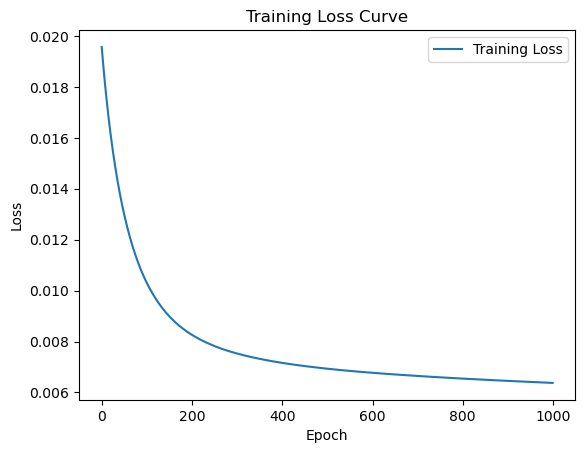

In [10]:

torch.manual_seed(42)
epochs = 1000

plt.figure()

losses = []
test_losses = []



for epoch in range(epochs):
    model_01.train() 
    # 1 forward pass 
    y_preds = model_01(X_train)
    # 2 calculate the loss 
    loss = loss_fn(y_preds,y_train)
    losses.append(loss.item())
    # 3 optomizer zero grad 
    optomizer.zero_grad()
    # 4 perfrom back propogation on the loss with respect to the parameters of the model 
    loss.backward()
    # 5. step the optimizer (perform gradeint descent )
    optomizer.step() # by deful how the optimzer changes will acculumate through the loop so we have to zero them above in step 3
    #TESTING
    model_01.eval() #tunrs off diffrence setting sin th emodel not needed evaluating/testing
    
    with torch.inference_mode():
        # 1. forward 
        test_pred = model_01(X_test)
        #2. lest 
        test_loss = loss_fn(test_pred,y_test)
        test_losses.append(test_loss.item())
    

    if epoch%100==0:
        #print(f"Loss: {y_preds}")
        print(f"Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}")

    
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()
    

In [11]:
model_01.train() 
    # 1 forward pass 
y_preds = model_01(X_train)
    # 2 calculate the loss 
loss = loss_fn(y_preds,y_train)
loss

tensor(0.0064, grad_fn=<MseLossBackward0>)

In [12]:
loss

tensor(0.0064, grad_fn=<MseLossBackward0>)

In [13]:
model_01.train() 
    # 1 forward pass 
y_preds = model_01(X_train)
loss = loss_fn(y_preds,y_train)
loss
optomizer.zero_grad()
    # 4 perfrom back propogation on the loss with respect to the parameters of the model 
loss.backward()
    # 5. step the optimizer (perform gradeint descent )
optomizer.step() # by deful how the optimzer changes will acculumate through the loop so we have to zero them above in step 3
    #TESTING
model_01.eval() #tunrs off diffrence setting sin th emodel not needed evaluating/testing

Model_0v1(
  (layer1): Linear(in_features=7, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)

In [14]:
y_preds = model_01(X_train)
loss = loss_fn(y_preds,y_train)
loss

tensor(0.0064, grad_fn=<MseLossBackward0>)

In [15]:
optomizer.zero_grad()
    # 4 perfrom back propogation on the loss with respect to the parameters of the model 
loss.backward()
    # 5. step the optimizer (perform gradeint descent )
optomizer.step() # by deful how the optimzer changes will acculumate through the loop so we have to zero them above in step 3
    #TESTING
model_01.eval()

Model_0v1(
  (layer1): Linear(in_features=7, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)